# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2019
***
**Name**: $<$Tenzin Choedon$>$ 
***

This assignment is due on Canvas by **11.59 PM on Wednesday, February 26th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted. The only exception to this rule is that you may copy code directly from your own solution to homework 1.

I discuss homework with Ryan and Jason on some confusion and performance comparison. 

## Overview 
***


Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. You'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import random

### [ 70 points] Problem 1: Implementing the Logistic Regression Classifier for Binary Classification
***

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np
np.set_printoptions(suppress=True)
class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data = Numbers('./mnist-1.pklz')

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
* [10 pts] Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

* [10 pts] Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

* [10 pts] Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

* [10 pts] Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

* [10 pts] Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [4]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w = np.zeros(X.shape[1]) # can remove from here and ask to be defined in the function
        self.eta = eta
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        return np.dot(self.w,x)
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        return 1/(1+np.exp(-score))
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient
        return x * (h-y)
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        # w = w - lambda * [1/(1 + e ^ - (w* x_i)) - y_i] * x_ik for k = 0 -> D
        for i in range(len(self.X)):
            self.w = self.w - self.eta * self.compute_gradient(self.X[i],self.sigmoid(self.calculate_score(self.X[i])),self.y[i])
        return self.w
    
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        # print("batch size",batch_size)
        for i in range(0,len(self.X),batch_size):
            
            if((i+batch_size) < len(self.X)):
                
                score  = self.calculate_score(self.X[i:i+batch_size].T)
                h      = self.sigmoid(score)
                self.w = self.w - self.eta * np.sum(self.compute_gradient(self.X[i:i+batch_size],h.reshape((-1, 1)),self.y[i:i+batch_size].reshape((-1, 1))),axis=0)
            
            else:                
                h      = self.sigmoid(self.calculate_score(self.X[i]))
                self.w = self.w - self.eta * self.compute_gradient(self.X[i],h,self.y[i])
        return self.w
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        pred = []
        if(update_method == 'sgd_update'):
            self.sgd_update()
        elif(update_method == 'mini_batch_update'):
            self.mini_batch_update(batch_size[0])
            
        log_prob_list = [] # array to store all the log prob.
        
        for i in range(len(test_x)):
            sig = self.sigmoid(self.calculate_score(test_x[i]))
            
            if(test_y[i] == 1):
                log_prob_list.append(np.log(sig))
            elif(test_y[i] == 0):
                log_prob_list.append(np.log(1-sig))
                
                
            if(abs(sig)> 0.5):
                pred.append(1)
            else:
                pred.append(0)
                
        acc = [1 if(pred[i]==test_y[i]) else 0 for i in range(len(test_y))]
        
        return (sum(log_prob_list)/len(test_y),acc.count(1)/len(acc))

In [5]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
    
        
      
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.009s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [6]:
# DO NOT DELETE THIS CELL !!!

In [7]:
# DO NOT DELETE THIS CELL !!!

In [8]:
# DO NOT DELETE THIS CELL !!!

In [9]:
# DO NOT DELETE THIS CELL !!!

In [10]:
# DO NOT DELETE THIS CELL !!!

**Q:** After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART A : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART B : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part A below. DO NOT DELETE THE CELL

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log


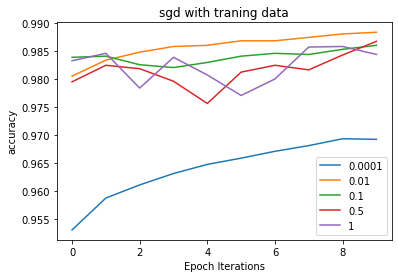

CPU times: user 17.5 s, sys: 241 ms, total: 17.8 s
Wall time: 18.1 s


In [62]:
%%time
# YOUR CODE HERE
eta       = [0.0001,0.01,0.1,0.5,1]
train_acc = []
X         = data.train_x
y         = data.train_y

for e in range(len(eta)): # with different value of step size
    acc = []
    LogReg_classifier = LogReg(X,y,eta[e]) # create new classifier for each eta value
    for j in range(10): # run 10 epochs
        idx   = np.arange(len(y)) # index
        np.random.shuffle(idx) # shuffle index
        X_mix = X[idx,:]
        y_mix = y[idx]
        LogReg_classifier.sgd_update()
        acc.append(LogReg_classifier.progress(X_mix[:],y_mix[:],'sgd_update')[1]) # pass in the log
    train_acc.append(acc)
    
fig,ax = plt.subplots()
for i in train_acc:
    ax.plot(np.arange(10),i)
    
ax.legend(eta,loc='lower right')
plt.xlabel("Epoch Iterations")
plt.ylabel("accuracy")
plt.title("sgd with traning data")
plt.show()

Implement part B below. DO NOT DELETE THE CELL

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log


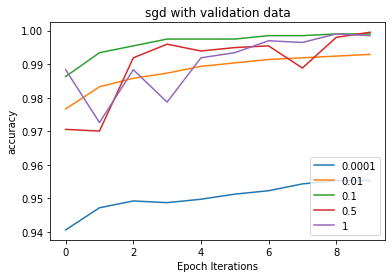

CPU times: user 3.8 s, sys: 43.7 ms, total: 3.84 s
Wall time: 3.97 s


In [63]:
%%time
# YOUR CODE HERE
eta       = [0.0001,0.01,0.1,0.5,1]
train_acc = []
X         = data.valid_x
y         = data.valid_y

for e in range(len(eta)): # with different value of step size
    acc = []
    LogReg_classifier = LogReg(X,y,eta[e]) # create new classifier for each eta value
    for j in range(10): # run 10 epochs
        idx   = np.arange(len(y)) # index
        np.random.shuffle(idx) # shuffle index
        X_mix = X[idx,:]
        y_mix = y[idx]
        LogReg_classifier.sgd_update()
        acc.append(LogReg_classifier.progress(X_mix[:],y_mix[:],'sgd_update')[1]) # pass in the log
    train_acc.append(acc)
    
fig,ax = plt.subplots()
for i in train_acc:
    ax.plot(np.arange(10),i)
    
ax.legend(eta,loc='lower right')
plt.xlabel("Epoch Iterations")
plt.ylabel("accuracy")
plt.title("sgd with validation data")
plt.show()

**Q:** After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART C : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART D : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part C below. DO NOT DELETE THE CELL

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log


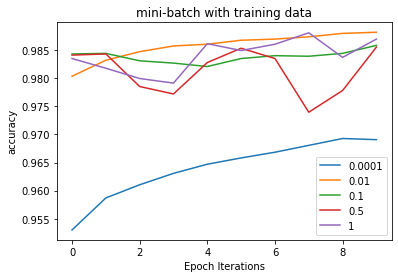

CPU times: user 19.1 s, sys: 304 ms, total: 19.4 s
Wall time: 19.8 s


In [60]:
%%time
# YOUR CODE HERE
eta       = [0.0001,0.01,0.1,0.5,1]
train_acc = []
X         = data.train_x
y         = data.train_y

for e in range(len(eta)): # with different value of step size
    acc = []
    LogReg_classifier = LogReg(X,y,eta[e]) # create new classifier for each eta value
    for j in range(10): # run 10 epochs
        idx = np.arange(len(y)) # index
        np.random.shuffle(idx) # shuffle index
        X_mix = X[idx,:]
        y_mix = y[idx]
        LogReg_classifier.mini_batch_update(2)
        acc.append(LogReg_classifier.progress(X_mix[:],y_mix[:],'mini_batch_update',2)[1]) # pass in the log
    train_acc.append(acc)
    
fig,ax = plt.subplots()
for i in train_acc:
    ax.plot(np.arange(10),i)
    
ax.legend(eta,loc='lower right')
plt.xlabel("Epoch Iterations")
plt.ylabel("accuracy")
plt.title("mini-batch with training data")

plt.show()

Implement part D below. DO NOT DELETE THE CELL

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log


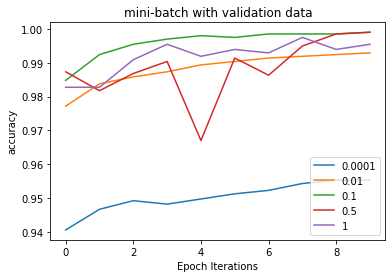

CPU times: user 4.04 s, sys: 72.8 ms, total: 4.12 s
Wall time: 4.34 s


In [59]:
%%time
# YOUR CODE HERE
eta       = [0.0001,0.01,0.1,0.5,1]
train_acc = []
X         = data.valid_x
y         = data.valid_y

for e in range(len(eta)): # with different value of step size
    acc = []
    LogReg_classifier = LogReg(X,y,eta[e]) # create new classifier for each eta value
    for j in range(10): # run 10 epochs
        idx = np.arange(len(y)) # index
        np.random.shuffle(idx) # shuffle index
        X_mix = X[idx,:]
        y_mix = y[idx]
        LogReg_classifier.mini_batch_update(2)
        acc.append(LogReg_classifier.progress(X_mix[:],y_mix[:],'mini_batch_update',2)[1]) # pass in the log
    train_acc.append(acc)
    
fig,ax = plt.subplots()
for i in train_acc:
    ax.plot(np.arange(10),i)
    
ax.legend(eta,loc='lower right')
plt.xlabel("Epoch Iterations")
plt.ylabel("accuracy")
plt.title("mini-batch with validation data")
plt.show()

**Q:** [5 pts] Describe the role of learning rate (eta) on the efficiency of convergence during training?

The smaller the learning rate is, the smoother the convergence is but sometime it can be less accurate like shown is the above plot of eta value 0.0001. But the larger the eta value is, there is steep drop in the accuracy due to more zig zag when it is descending close to minimum or goal. We can see that in the plot. Eta value of 0.5 fluctuated alot while eta value 0.0001, 0.01,0.1 was descending pretty smooth. When we take the right amount of steps, then we descends smooth and also get really good accuracy. Smaller steps can also cost more to get to the goal.  

**Q:** [5 pts] Describe the role of the number of epochs on validation accuracy?

The more epochs we run on certain range of smaller step size, the more accurate result we get like it is shown in all the plots above. But that can't be said for all cases. The bigger steps like 1 didn't benifit much from more number of epochs. As we can see in the plots, the accuracy doesn't increase consistant like eta value of 0.1. So it depends on steps size value. 

### [ 30 points] Problem 2: Implementing the Logistic Regression Classifier for Multinomial Classification

You will not create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

* [5 pts] 2.1 Normalize your data.
* [5 pts] 2.2 Transform your outputs into a set of binary features via one-hot encoding.
* [5 pts] 2.3 Write get_optimal_parameters - train all ten models at once.
* [5 pts] 2.4 Calculate the accuracy of your model on Train and Test data.
* [5 pts] 2.5 Generate a confusion matrix on test and train Data.
* [5 pts] 2.6 Predict the labels of the first ten datapoints from your test set alongside the images of those same datapoints.

In [16]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


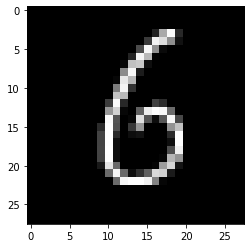

In [52]:
data2 = Numbers2('./mnist-1.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [37]:
from sklearn import preprocessing

class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.1):
        self.X = self.normalize_data(X)
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        self.classifier = [LogReg(self.X,self.y[:,i]) for i in range(10)]
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        m = np.zeros([len(y),10])
        for i in range(len(y)): #update matrix with value 1 for each with corresponding value
            m[i] = [1 if(ii == y[i]) else 0 for ii in range(10)]
        return m
    def normalize_data(self, X):
        # TO DO: Normalize the feature values of dataset X using the mean and standard deviation of the respective features 
        
        return preprocessing.scale(X)

    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to it's class which is (0-9), and the cost function will be against all of the other 
        # numbers "the rest".
        X   = self.X
        y   = self.y
        
        for j in range(10): # run and update each models
            for e in range(6): # run X epochs
                idx = np.arange(len(y)) # index
                np.random.shuffle(idx) # shuffle index
                X_mix = X[idx,:]
                y_mix = y[idx,j]
                self.classifier[j].progress(X_mix[:],y_mix[:],'sgd_update') # update classifier
            
    def predict(self, test_image, test_label):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        p = np.zeros([10,2])
        for i in range(10): p[i,0] = i # initialize first column with digit
        for i in range(10):
            p[i,1] = self.classifier[i].sigmoid(self.classifier[i].calculate_score(test_image)) # store probabilty
            
        return p

In [19]:
# DO NOT DELETE THIS CELL !!!

In [20]:
# DO NOT DELETE THIS CELL !!!

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most. Finally use the predict method to predict the labels for the FIRST 10 instances from the test set, while also plotting the respective images for validation.

Train a MultiLogReg Model in the cell below. DO NOT DELETE THE CELL

In [38]:
# YOUR CODE HERE
mul_LogReg_classifier = MultiLogReg(data2.train_x,data2.train_y)
mul_LogReg_classifier.get_optimal_parameters()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


Compute the accuracy on the train and test data from Numbers2 using the model you trained above. DO NOT DELETE THE CELL

In [45]:
# YOUR CODE HERE
# 6 epochs seems to give the highest accuracy of 0.55 for train data
# train_pred_arr = []
# test_pred_arr = []
N = 10
train_C = np.array(np.zeros([N,N]))
test_C = np.array(np.zeros([N,N]))

for i in range(len(data2.train_y)):
    pred = mul_LogReg_classifier.predict(data2.train_x[i],data2.train_y[i])
    row = data2.train_y[i]
    col = int(pred[np.argmax(pred[:,1]),0])
#     train_pred_arr.append(pred[np.argmax(pred[:,1]),0]) # update prediction array
    train_C[row][col] += 1 # update confusion matrix
score = np.sum(train_C.diagonal()) / train_C.sum()
print("training data score: ",score)

for i in range(len(data2.test_y)):
    pred = mul_LogReg_classifier.predict(data2.test_x[i],data2.test_y[i])
    row = data2.test_y[i]
    col = int(pred[np.argmax(pred[:,1]),0])
#     train_pred_arr.append(pred[np.argmax(pred[:,1]),0]) # update prediction array
    test_C[row][col] += 1 # update confusion matrix
score = np.sum(test_C.diagonal()) / test_C.sum()
print("test date score: ",score)


training data score:  0.55034
test date score:  0.5746


In [33]:
# Here I am trying and see if the eta value effect accuracy, but it doesn't seem to in this case. Below is the accuracy 
# rate for running 6 epochs

eta = [0.0001,0.01,0.1,0.5,1]
for e in eta:
    mul_LogReg_classifier = MultiLogReg(data2.train_x,data2.train_y,e)
    mul_LogReg_classifier.get_optimal_parameters()
    train_pred_arr = []
    test_pred_arr = []
    N = 10
    C = np.array(np.zeros([N,N]))
    for i in range(len(data2.train_y)):
        pred = mul_LogReg_classifier.predict(data2.train_x[i],data2.train_y[i])
        row = data2.train_y[i]
        col = int(pred[np.argmax(pred[:,1]),0])
        train_pred_arr.append(pred[np.argmax(pred[:,1]),0]) # update prediction array
        C[row][col] += 1 # update confusion matrix
    score = np.sum(C.diagonal()) / C.sum()
    print(e,score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


0.0001 0.55034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


0.01 0.55034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


0.1 0.55034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


0.5 0.55034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


1 0.55034


Plot the confusion matrix on Test and Train Data using the model you trained before. DO NOT DELETE THE CELL

In [49]:
# YOUR CODE HERE
# create confusion matrix for both test and training data
print("Training data confusion matrix:")
print(train_C)
print("\n\nTesting data confusion matrix:")
print(test_C)

Training data confusion matrix:
[[4256.    2.   23.   92.   41.   41.    1.    1.  391.   84.]
 [   1. 4409.   88.   51.   78.    5.    0.    0.  971.   75.]
 [  78.  130. 3151.  175.   93.   12.    3.    5. 1129.  192.]
 [ 184.   73.  249. 2799.   97.   93.    0.    8. 1118.  480.]
 [   7.   30.   66.   42. 3559.   22.    3.    1.  656.  473.]
 [ 733.   54.   50.  489.  492. 1576.    7.    1.  964.  140.]
 [ 238.   76.  190.   32.  203.  329. 1061.    0. 1884.  938.]
 [ 116.   94.   52.  867.  800.   27.    0. 1160. 1546.  513.]
 [ 378.  192.   78.  333.  343.  273.    1.    1. 3125.  118.]
 [  70.   17.   36.  325.  764.   85.    0.   30. 1240. 2421.]]


Testing data confusion matrix:
[[850.   0.   4.  14.  12.  10.   0.   0.  82.  19.]
 [  0. 854.   8.   8.   9.   0.   0.   0. 168.  17.]
 [  9.  25. 663.  21.  11.   0.   0.   0. 229.  32.]
 [ 32.  10.  33. 573.  22.  14.   0.   1. 254.  91.]
 [  2.   9.   5.   6. 741.   2.   0.   0. 136.  82.]
 [146.   7.  20. 105.  94. 359.   1.   

Predict Labels of First 10 datapoints from your test set and also the plot their images in the cell below. DO NOT DELETE THE CELL

true label: 3
true label: 8
true label: 6
true label: 9
true label: 6
true label: 4
true label: 5
true label: 3
true label: 8
true label: 4


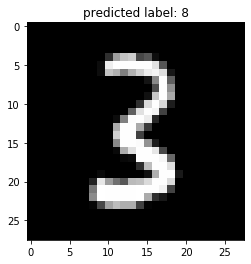

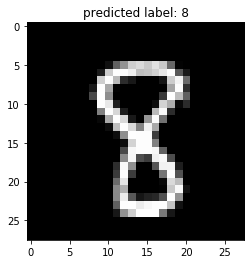

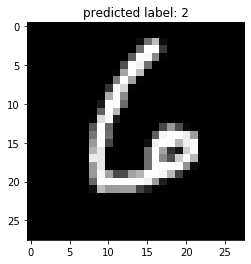

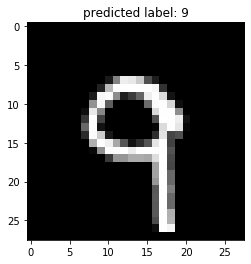

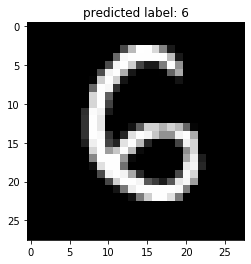

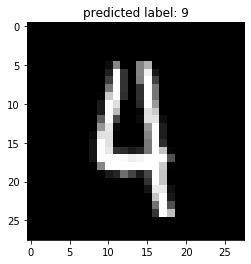

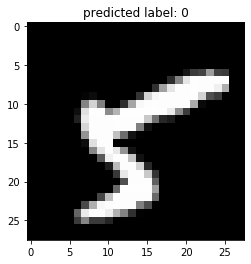

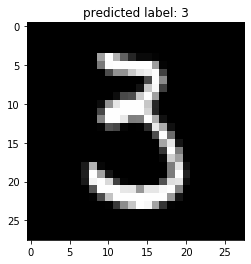

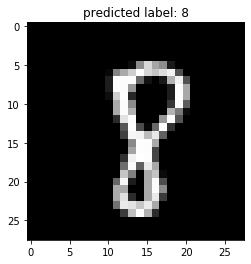

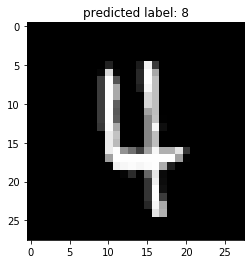

In [58]:
# YOUR CODE HERE
for i in range(10):
    plt.figure()
    pred = mul_LogReg_classifier.predict(data2.test_x[i],data2.test_y[i])
    
    idx = int(pred[np.argmax(pred[:,1]),0])
#     print("predicted label: " ,idx)
    plt.title("predicted label: {}".format(idx))
    view_digit(data2.test_x[i],data2.test_y[i])
    